## Library Import

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd
from sklearn.metrics import accuracy_score

## Data Loading

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 12s 0us/step


In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [11]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 9863
다음 그림은 Frog 입니다.


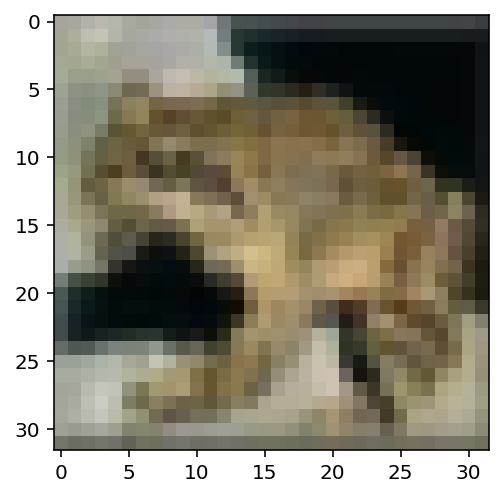

In [12]:
id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[y_test[id][0]]} 입니다.')
plt.imshow(x_test[id])
plt.show()

In [13]:
# Standardization (mean:0, std:1)
mean_v = x_train.mean()
std_v = x_train.std()

x_train = (x_train - mean_v) / std_v
x_test = (x_test - mean_v) / std_v

In [14]:
# one-hot encoding

from tensorflow.keras.utils import to_categorical

In [15]:
class_n = len(np.unique(y_train))

y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)

## Modeling

In [16]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [17]:
# 1. Session Clear
clear_session()

# 2. Model
model = Sequential()

# 3. Layer
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [19]:
# Early Stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [20]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1024,
                    validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/100
40/40 [==============================] - 19s 129ms/step - loss: 1.8269 - accuracy: 0.4388 - val_loss: 2.2038 - val_accuracy: 0.1794
Epoch 2/100
40/40 [==============================] - 3s 82ms/step - loss: 1.1356 - accuracy: 0.6023 - val_loss: 3.0565 - val_accuracy: 0.1036
Epoch 3/100
40/40 [==============================] - 3s 83ms/step - loss: 0.9448 - accuracy: 0.6687 - val_loss: 5.6421 - val_accuracy: 0.1003
Epoch 4/100
40/40 [==============================] - 3s 83ms/step - loss: 0.8133 - accuracy: 0.7120 - val_loss: 7.5023 - val_accuracy: 0.1011
Epoch 5/100
40/40 [==============================] - 3s 84ms/step - loss: 0.7070 - accuracy: 0.7518 - val_loss: 8.6109 - val_accuracy: 0.1058
Epoch 6/100
40/40 [==============================] - 3s 84ms/step - loss: 0.6135 - accuracy: 0.7868 - val_loss: 10.3687 - val_accuracy: 0.1145
Epoch 7/100
40/40 [==============================] - 3s 84ms/step - loss: 0.5153 - accuracy: 0.8228 - val_loss: 7.9930 - val_accuracy: 0.1668
Epo

## 성능 평가

In [21]:
performance_test = model.evaluate(x_test, y_test, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 1s 4ms/step - loss: 0.9280 - accuracy: 0.7489
Test Loss : 0.928006,  Test Accuracy : 74.890%


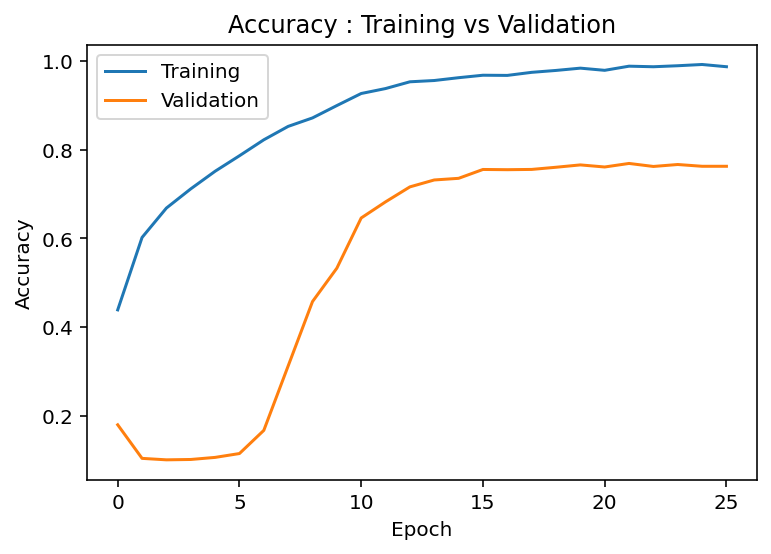

In [22]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

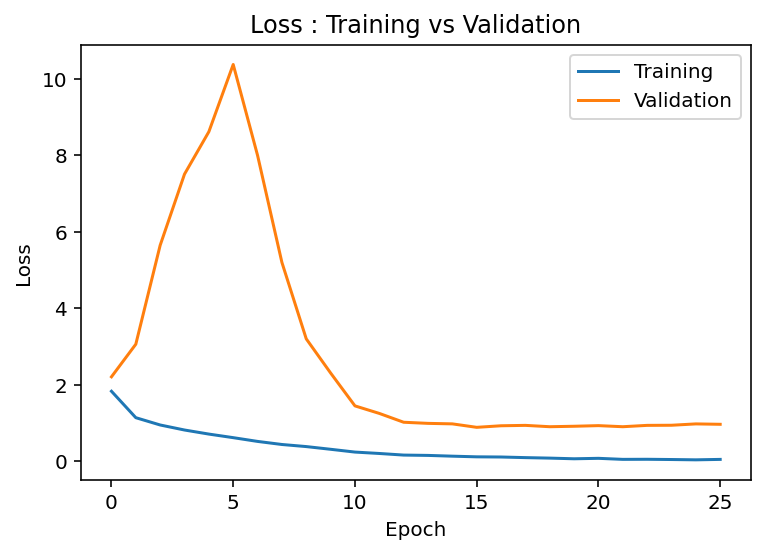

In [23]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
# one-hot encoding 해제
y_train = y_train.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [25]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(y_train, single_pred_train)
logi_test_accuracy = accuracy_score(y_test, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

CNN
트레이닝 정확도 : 94.87%
테스트 정확도 : 74.89%


id = 2209
다음 그림은 Deer 입니다.
모델의 예측 : Deer
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 13.0, 'Cat': 0.0, 'Deer': 55.0, 'Dog': 30.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


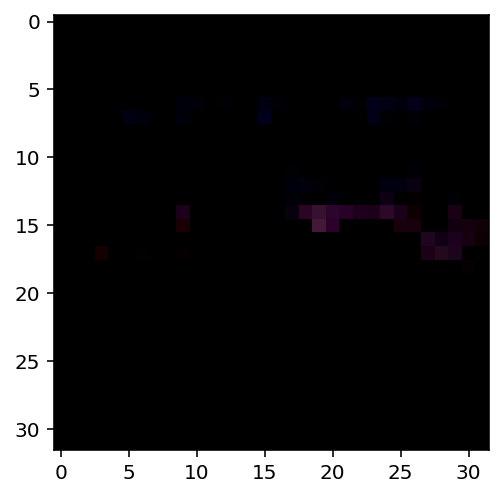

In [26]:
# 맞는 것 관찰
id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[y_test[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if y_test[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(x_test[id].reshape([32,32,-1]))
plt.show()

id = 5939
다음 그림은 Truck 입니다.
모델의 예측 : Automobile
모델의 카테고리별 확률 : 
{'Airplane': 1.0, 'Automobile': 70.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 26.0}
틀렸어요


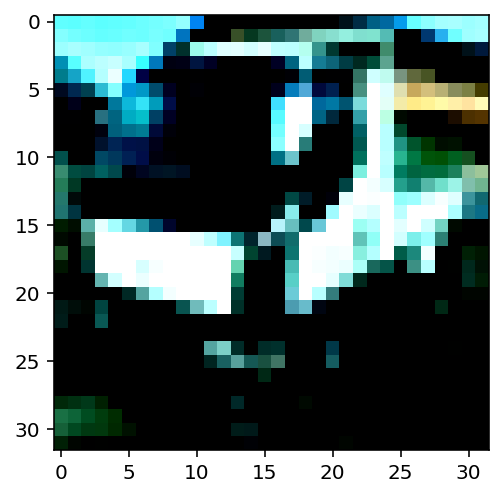

In [27]:
# 틀린 것 관찰
true_false = (y_test == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 {labels[y_test[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if y_test[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(x_test[id].reshape([32,32,-1]))
plt.show()